**APPENDIX C**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Aotizhongxin - Copy.csv",parse_dates=['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    35064 non-null  datetime64[ns]
 1   PM2.5   35064 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 548.0 KB


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
type(df['date'])

pandas.core.series.Series

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
 isinstance(df.index, pd.DatetimeIndex) 

True

In [ ]:
format = '%Y-%m-%d %H:%M:%S'
df['date'] = pd.to_datetime(df['date'], format=format)
df = df.set_index(pd.DatetimeIndex(df['date']))

In [ ]:
df.set_index('date')

,PM2.5
date,
2013-01-03 00:00:00,4.0
2013-01-03 01:00:00,8.0
2013-01-03 02:00:00,7.0
2013-01-03 03:00:00,6.0
2013-01-03 04:00:00,3.0
...,...
2017-02-28 19:00:00,12.0
2017-02-28 20:00:00,13.0
2017-02-28 21:00:00,16.0


In [ ]:
month_average = df['PM2.5'].resample('MS').mean()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1440x1440 with 0 Axes>

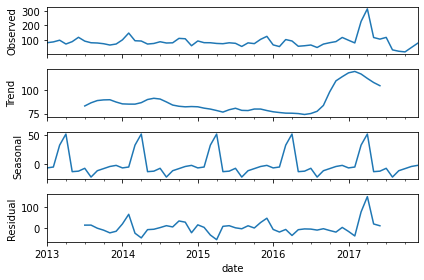

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.figure(figsize=(20,20))
decomposition = sm.tsa.seasonal_decompose(month_average, model='additive')
fig = decomposition.plot()
plt.show()


In [ ]:
from   statsmodels.tsa.stattools  import  adfuller
result = adfuller(month_average) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
#print(result.summary())

ADF Statistic: -3.882722
p-value: 0.002166


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(month_average, order=(0,1,1))
results = model.fit(disp=-1)

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df['PM2.5'].iloc[0], index=df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)


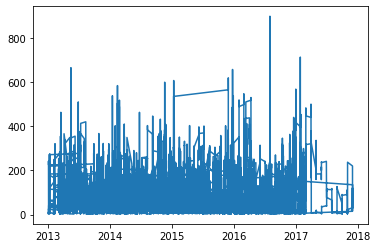

In [ ]:
plt.plot(df['date'],df['PM2.5'])

In [ ]:
df.to_csv('check_new.csv')

In [ ]:
type(predictions_ARIMA.asfreq('M'))

pandas.core.series.Series

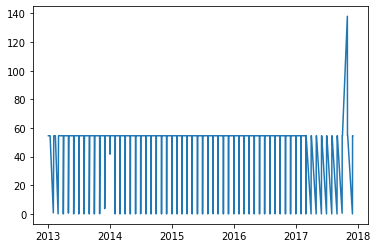

In [ ]:
plt.plot(predictions_ARIMA)

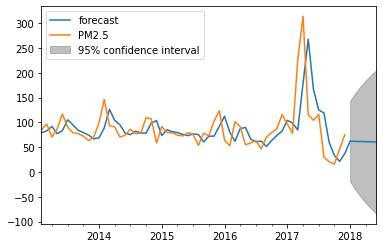

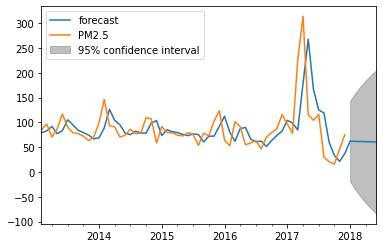

In [ ]:
results.plot_predict(1,65)

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.PM2.5   No. Observations:                   59
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -303.558
Method:                       css-mle   S.D. of innovations             41.474
Date:                Wed, 28 Apr 2021   AIC                            613.116
Time:                        11:12:58   BIC                            619.348
Sample:                    02-01-2013   HQIC                           615.549
                         - 12-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3322      3.606     -0.092      0.927      -7.400       6.736
ma.L1.D.PM2.5    -0.3387      0.194     -1.741      0.087      -0.720       0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.9526           +0.0000j            2.9526            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
qqq = (predictions_ARIMA.asfreq('M'))

In [ ]:
www =month_average[0:59]

In [ ]:
qqq = np.nan_to_num(qqq)

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(www,qqq))
print(metrics.mean_squared_error(www,qqq))
print(metrics.mean_squared_error(www,qqq,squared=False))

42.6154315958466
4423.687662079496
66.51080861092801


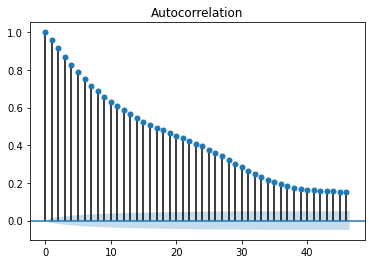

In [ ]:

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['PM2.5'])
pyplot.show()

In [ ]:
 mod = sm.tsa.statespace.SARIMAX(month_average,
                                            order=(0,1,2),
                                            seasonal_order=(0,1,2,6),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()

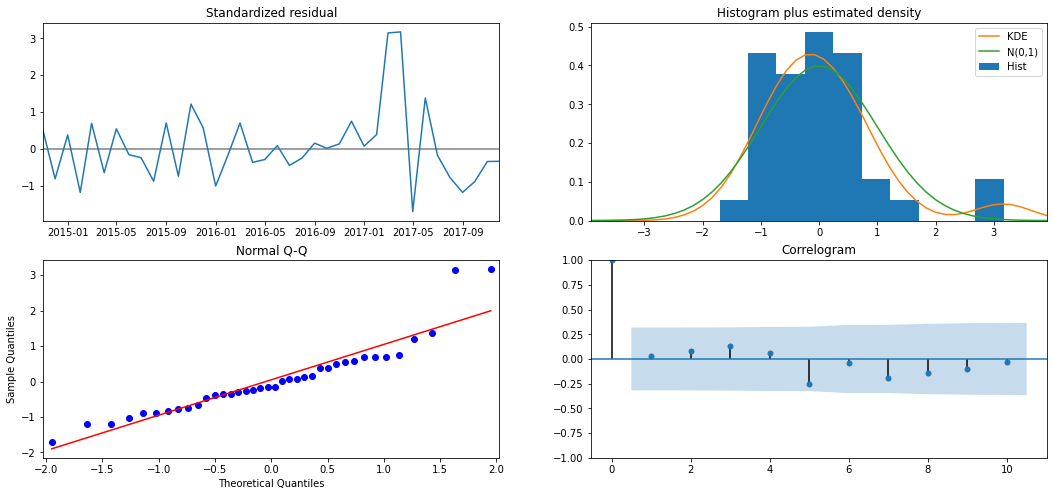

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
x = results.predict(1,65)

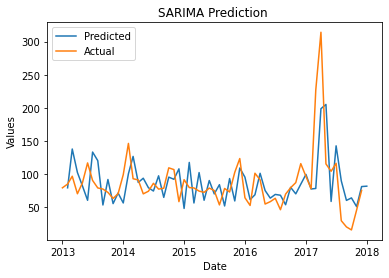

In [ ]:
plt.plot(x, label = 'Predicted')
plt.plot(month_average, label = 'Actual')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('SARIMA Prediction ')
# show a legend on the plot
plt.legend()
plt.show()

In [ ]:
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                             PM2.5   No. Observations:                   60
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 2)   Log Likelihood                -256.419
Date:                           Wed, 28 Apr 2021   AIC                            522.839
Time:                                   12:32:21   BIC                            532.399
Sample:                               01-01-2013   HQIC                           526.479
                                    - 12-01-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2340    589.849     -0.000      1.000   -1156.318    1155.850
ma.L2         -0.7660    451.695     -0.002

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(month_average,x))
print(metrics.mean_squared_error(month_average,x))
print(metrics.mean_squared_error(month_average,x,squared=False))

17.51959012054277
607.4214798911852
24.645922175710634


In [ ]:
n_test = 2
train, test = df[:-n_test], df[-n_test:]

In [ ]:
print(df)

                                   date  PM2.5
date                                          
2013-01-03 00:00:00 2013-01-03 00:00:00    4.0
2013-01-03 01:00:00 2013-01-03 01:00:00    8.0
2013-01-03 02:00:00 2013-01-03 02:00:00    7.0
2013-01-03 03:00:00 2013-01-03 03:00:00    6.0
2013-01-03 04:00:00 2013-01-03 04:00:00    3.0
...                                 ...    ...
2017-02-28 19:00:00 2017-02-28 19:00:00   12.0
2017-02-28 20:00:00 2017-02-28 20:00:00   13.0
2017-02-28 21:00:00 2017-02-28 21:00:00   16.0
2017-02-28 22:00:00 2017-02-28 22:00:00   21.0
2017-02-28 23:00:00 2017-02-28 23:00:00   19.0

[35064 rows x 2 columns]


In [ ]:
n_test = 23766
train, test = df['PM2.5'], df['PM2.5']
train, test = train[:-n_test], test[-n_test:]

print(test)

date
2014-06-14 18:00:00    52.0
2014-06-14 19:00:00    51.0
2014-06-14 20:00:00    57.0
2014-06-14 21:00:00    72.0
2014-06-14 22:00:00    83.0
                       ... 
2017-02-28 19:00:00    12.0
2017-02-28 20:00:00    13.0
2017-02-28 21:00:00    16.0
2017-02-28 22:00:00    21.0
2017-02-28 23:00:00    19.0
Name: PM2.5, Length: 23766, dtype: float64


In [ ]:
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)

ValueError: ignored

In [ ]:
model_fit = model.fit()

ValueError: ignored

In [ ]:
yhat = model_fit.forecast(horizon=1000)

NameError: ignored

In [ ]:
print(yhat)

NameError: ignored

In [ ]:
import statistics
#pyplot.plot(tt)
var = [i*0.01 for i in range(0,6000)]
pyplot.plot(df[-n_test:])
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

ValueError: ignored

In [ ]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = df[:-n_test], df[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:], label = 'Actual Variance')
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :], label = 'Predicted Variance')

plt.title('GARCH Prediction ')
# show a legend on the plot
plt.legend()

pyplot.show()

ValueError: ignored

Iteration:      1,   Func. Count:     18,   Neg. LLF: 45.01079847993596
Iteration:      2,   Func. Count:     37,   Neg. LLF: 42.050656745002726
Iteration:      3,   Func. Count:     56,   Neg. LLF: 41.01054515268306
Iteration:      4,   Func. Count:     74,   Neg. LLF: 38.65129877351371
Iteration:      5,   Func. Count:     93,   Neg. LLF: 38.471513641070146
Iteration:      6,   Func. Count:    112,   Neg. LLF: 38.399365623618436
Iteration:      7,   Func. Count:    130,   Neg. LLF: 38.39334744712312
Iteration:      8,   Func. Count:    148,   Neg. LLF: 38.392017058278725
Iteration:      9,   Func. Count:    166,   Neg. LLF: 38.39201436414302
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 38.39201445623142
            Iterations: 9
            Function evaluations: 166
            Gradient evaluations: 9


/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


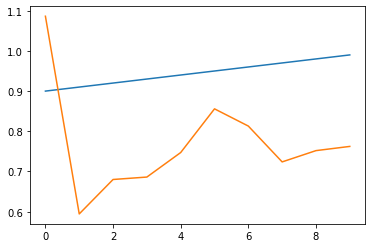

In [ ]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='HARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 41.42285909902891
Iteration:      2,   Func. Count:     37,   Neg. LLF: 38.58236083168643
Iteration:      3,   Func. Count:     56,   Neg. LLF: 36.70857630115163
Iteration:      4,   Func. Count:     75,   Neg. LLF: 35.64329949592393
Iteration:      5,   Func. Count:     94,   Neg. LLF: 34.388550595379975
Iteration:      6,   Func. Count:    113,   Neg. LLF: 31.603119552517732
Iteration:      7,   Func. Count:    132,   Neg. LLF: 30.180005155417653
Iteration:      8,   Func. Count:    150,   Neg. LLF: 28.719725365835618
Iteration:      9,   Func. Count:    169,   Neg. LLF: 25.76384751972326
Iteration:     10,   Func. Count:    189,   Neg. LLF: 25.732447890170047
Iteration:     11,   Func. Count:    208,   Neg. LLF: 25.649898218420457
Iteration:     12,   Func. Count:    227,   Neg. LLF: 25.560400051601007
Iteration:     13,   Func. Count:    247,   Neg. LLF: 25.546556809654177
Iteration:     14,   Func. Count:    266,   Neg. LLF: 25

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


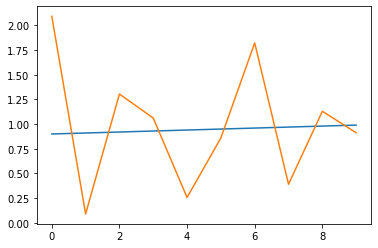

In [ ]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

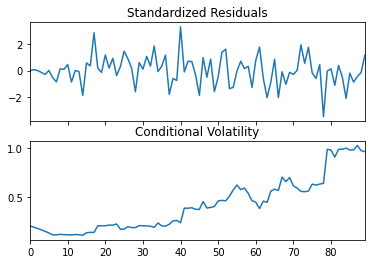

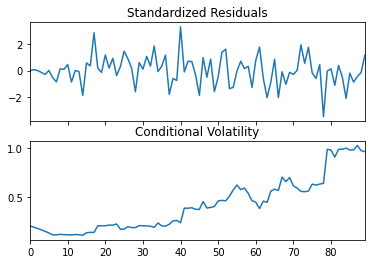

In [ ]:
model_fit.plot()

In [ ]:
print(model_fit.summary())

                       Zero Mean - HARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      HARCH   Log-Likelihood:               -38.3920
Distribution:                  Normal   AIC:                           108.784
Method:            Maximum Likelihood   BIC:                           148.781
                                        No. Observations:                   90
Date:                Fri, Apr 02 2021   Df Residuals:                       90
Time:                        18:53:35   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0107  1.599e-02      0.669      0.503 

In [ ]:
tt= df['PM2.5'].resample('MS').var()
tt = train[-100:]
print(tt)

11198    104.0
11199     90.0
11200     49.0
11201     53.0
11202     75.0
         ...  
11293     37.0
11294     42.0
11295     45.0
11296     39.0
11297     42.0
Name: PM2.5, Length: 100, dtype: float64


In [ ]:
print(yhat.variance.values[-1:])

[[1962.96259138 2153.47706373 2333.9166577  2504.94993075 2667.06031658
  2820.71622602 2966.36141895 3104.41322362 3235.26755651 3359.29966275
  3476.8652263  3588.30138703 3693.92770772 3794.0470904  3888.94664503
  3978.89851276 4064.16064638 4144.97755007 4221.58098049 4294.19061147
  4363.01466388 4428.25050279 4490.08520345 4548.69608773 4604.25123266
  4656.90995237 4706.823255   4754.13427573 4798.97868723 4841.48508874
  4881.77537482 4919.96508498 4956.16373491 4990.47513061 5022.99766603
  5053.82460528 5083.04435001 5110.74069298 5136.99305834 5161.87672934
  5185.4630643  5207.81970117 5229.01075155 5249.09698449 5268.1360008
  5286.18239822 5303.28792795 5319.50164311 5334.87003939 5349.43718835
  5363.24486386 5376.33266186 5388.73811392 5400.49679483 5411.6424247
  5422.20696558 5432.22071313 5441.71238355 5450.70919587 5459.23695003
  5467.32010087 5474.98182823 5482.24410348 5489.12775246 5495.65251525
  5501.83710275 5507.69925035 5513.2557688  5518.52259238 5523.514

In [ ]:
df['PM2.5'].var()

6683.304419630514

In [ ]:
print(train)

                                   date  PM2.5  ...  Unnamed: 6  Unnamed: 7
date                                            ...                        
2013-01-03 00:00:00 2013-01-03 00:00:00    4.0  ...         NaN         NaN
2013-01-03 01:00:00 2013-01-03 01:00:00    8.0  ...         NaN         NaN
2013-01-03 02:00:00 2013-01-03 02:00:00    7.0  ...         NaN         NaN
2013-01-03 03:00:00 2013-01-03 03:00:00    6.0  ...         NaN         NaN
2013-01-03 04:00:00 2013-01-03 04:00:00    3.0  ...         NaN         NaN
...                                 ...    ...  ...         ...         ...
2014-06-14 13:00:00 2014-06-14 13:00:00   37.0  ...         NaN         NaN
2014-06-14 14:00:00 2014-06-14 14:00:00   42.0  ...         NaN         NaN
2014-06-14 15:00:00 2014-06-14 15:00:00   45.0  ...         NaN         NaN
2014-06-14 16:00:00 2014-06-14 16:00:00   39.0  ...         NaN         NaN
2014-06-14 17:00:00 2014-06-14 17:00:00   42.0  ...         NaN         NaN

[11298 rows

In [ ]:
pip install arch

     |████████████████████████████████| 808kB 8.4MB/s 


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
import pandas as pd
trial = pd.read_csv("g.csv")

In [ ]:
format = '%Y-%m-%d %H:%M:%S'
x = pd.to_datetime(trial['date'], format=format)
trial = trial.set_index(pd.DatetimeIndex(x))

In [ ]:
 isinstance(trial.index, pd.DatetimeIndex) 

False

In [ ]:
print(trial)

         date       PM2.5
0  2013-01-01   79.370833
1  2013-02-01   85.023611
2  2013-03-01   96.853448
3  2013-04-01   70.413690
4  2013-05-01   86.848659
5  2013-06-01  116.942460
6  2013-07-01   90.528257
7  2013-08-01   79.195402
8  2013-09-01   77.488591
9  2013-10-01   72.455939
10 2013-11-01   63.365575
11 2013-12-01   70.443966
12 2014-01-01   99.215905
13 2014-02-01  146.371925
14 2014-03-01   93.100358
15 2014-04-01   91.165741
16 2014-05-01   70.248118
17 2014-06-01   74.223611
18 2014-07-01   86.179659
19 2014-08-01   77.401434
20 2014-09-01   78.781481
21 2014-10-01  109.517473
22 2014-11-01  106.871759
23 2014-12-01   58.491039
24 2015-01-01   91.641263
25 2015-02-01   79.739087
26 2015-03-01   79.188530
27 2015-04-01   74.390278
28 2015-05-01   72.546147
29 2015-06-01   78.969444
30 2015-07-01   75.221774
31 2015-08-01   53.593638
32 2015-09-01   78.406019
33 2015-10-01   73.043235
34 2015-11-01  102.756944
35 2015-12-01  123.545699
36 2016-01-01   64.387545
37 2016-02-0

In [ ]:
trial.date

0    2013-01-01
1    2013-02-01
2    2013-03-01
3    2013-04-01
4    2013-05-01
5    2013-06-01
6    2013-07-01
7    2013-08-01
8    2013-09-01
9    2013-10-01
10   2013-11-01
11   2013-12-01
12   2014-01-01
13   2014-02-01
14   2014-03-01
15   2014-04-01
16   2014-05-01
17   2014-06-01
18   2014-07-01
19   2014-08-01
20   2014-09-01
21   2014-10-01
22   2014-11-01
23   2014-12-01
24   2015-01-01
25   2015-02-01
26   2015-03-01
27   2015-04-01
28   2015-05-01
29   2015-06-01
30   2015-07-01
31   2015-08-01
32   2015-09-01
33   2015-10-01
34   2015-11-01
35   2015-12-01
36   2016-01-01
37   2016-02-01
38   2016-03-01
39   2016-04-01
40   2016-05-01
41   2016-06-01
42   2016-07-01
43   2016-08-01
44   2016-09-01
45   2016-10-01
46   2016-11-01
47   2016-12-01
48   2017-01-01
49   2017-02-01
50   2017-03-01
51   2017-04-01
52   2017-05-01
53   2017-06-01
54   2017-07-01
55   2017-08-01
56   2017-09-01
57   2017-10-01
58   2017-11-01
59   2017-12-01
Name: date, dtype: datetime64[ns]

In [ ]:
type(trial)

pandas.core.frame.DataFrame

In [ ]:
trial.squeeze()

,date,PM2.5
0,2013-01-01,79.370833
1,2013-02-01,85.023611
2,2013-03-01,96.853448
3,2013-04-01,70.413690
4,2013-05-01,86.848659
5,2013-06-01,116.942460
6,2013-07-01,90.528257
7,2013-08-01,79.195402
8,2013-09-01,77.488591
9,2013-10-01,72.455939


In [ ]:
x = pd.Series((trial['date'],trial['PM2.5']), index=trial['date'])

In [ ]:
x = pd.Series(z, index=trial['date'])

In [ ]:
z = np.array(trial['date'],trial['PM2.5'])
print(z)

[1.3569984e+18 1.3596768e+18 1.3620960e+18 1.3647744e+18 1.3673664e+18
 1.3700448e+18 1.3726368e+18 1.3753152e+18 1.3779936e+18 1.3805856e+18
 1.3832640e+18 1.3858560e+18 1.3885344e+18 1.3912128e+18 1.3936320e+18
 1.3963104e+18 1.3989024e+18 1.4015808e+18 1.4041728e+18 1.4068512e+18
 1.4095296e+18 1.4121216e+18 1.4148000e+18 1.4173920e+18 1.4200704e+18
 1.4227488e+18 1.4251680e+18 1.4278464e+18 1.4304384e+18 1.4331168e+18
 1.4357088e+18 1.4383872e+18 1.4410656e+18 1.4436576e+18 1.4463360e+18
 1.4489280e+18 1.4516064e+18 1.4542848e+18 1.4567904e+18 1.4594688e+18
 1.4620608e+18 1.4647392e+18 1.4673312e+18 1.4700096e+18 1.4726880e+18
 1.4752800e+18 1.4779584e+18 1.4805504e+18 1.4832288e+18 1.4859072e+18
 1.4883264e+18 1.4910048e+18 1.4935968e+18 1.4962752e+18 1.4988672e+18
 1.5015456e+18 1.5042240e+18 1.5068160e+18 1.5094944e+18 1.5120864e+18]


In [ ]:
print(x)

date
2013-01-01    1.356998e+18
2013-02-01    1.359677e+18
2013-03-01    1.362096e+18
2013-04-01    1.364774e+18
2013-05-01    1.367366e+18
2013-06-01    1.370045e+18
2013-07-01    1.372637e+18
2013-08-01    1.375315e+18
2013-09-01    1.377994e+18
2013-10-01    1.380586e+18
2013-11-01    1.383264e+18
2013-12-01    1.385856e+18
2014-01-01    1.388534e+18
2014-02-01    1.391213e+18
2014-03-01    1.393632e+18
2014-04-01    1.396310e+18
2014-05-01    1.398902e+18
2014-06-01    1.401581e+18
2014-07-01    1.404173e+18
2014-08-01    1.406851e+18
2014-09-01    1.409530e+18
2014-10-01    1.412122e+18
2014-11-01    1.414800e+18
2014-12-01    1.417392e+18
2015-01-01    1.420070e+18
2015-02-01    1.422749e+18
2015-03-01    1.425168e+18
2015-04-01    1.427846e+18
2015-05-01    1.430438e+18
2015-06-01    1.433117e+18
2015-07-01    1.435709e+18
2015-08-01    1.438387e+18
2015-09-01    1.441066e+18
2015-10-01    1.443658e+18
2015-11-01    1.446336e+18
2015-12-01    1.448928e+18
2016-01-01    1.451606e

In [ ]:
model = VAR(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: ignored

In [ ]:
month_average.to_csv("g.csv")